In [1]:
import numpy as np
import sys

sys.path.append("../")
from experiment.experiment import Experiment
from envs.bandits import BanditFactory
from algorithms.algorithms import AlgorithmFactory

In [2]:
from envs.linear.guassian import LinGuassianBandit
from envs.linear.close_arms_2d import CloseArms2D
from algorithms.linear.lin_uniform import LinUniform
from algorithms.linear.lin_max_uncertainty import LinMaxUncertainty
from algorithms.linear.lin_UTS import LinUTS
from algorithms.linear.lin_TTS import LinTS

In [3]:
uniform_factory = AlgorithmFactory(LinUniform, "uniform", [], reg=1)
max_uncertainty_factory = AlgorithmFactory(
    LinMaxUncertainty, "max uncertainty", [], reg=1
)
uts_factory = AlgorithmFactory(LinUTS, "UTS", [], reg=1)
lts_factory = AlgorithmFactory(LinTS, "TS", [], reg=1)

ling_factory = BanditFactory(
    LinGuassianBandit,
    "guassian",
    n_arms=20,
    n_contexts=20,
    d=2,
    fit_into_unit_ball=True,
    fixed_theta=True,
)
close_factory = BanditFactory(
    CloseArms2D,
    "close arms",
    n_arms=3,
    n_contexts=1,
    d=2,
    fit_into_unit_ball=True,
)

experiment = Experiment(
    [
        # ling_factory,
        close_factory,
    ],
    [
        uts_factory,
        # uniform_factory,
        max_uncertainty_factory,
        lts_factory,
    ],
)

In [4]:
from experiment.simple_regret import SimpleRegret
from experiment.action_tracker import ActionTracker
from experiment.theta_tracker import ThetaTracker

simple_regret_callback = SimpleRegret(interval=10)
action_tracker_callback = ActionTracker(arm_pair=False)
theta_tracker_callback = ThetaTracker(interval=10, style="together", show_actions=False)

experiment.add_callback(simple_regret_callback)
experiment.add_callback(action_tracker_callback)
experiment.add_callback(theta_tracker_callback)

Finished run 1 of 20 for close arms in 0.3256831169128418 seconds
Finished run 2 of 20 for close arms in 0.6499052047729492 seconds
Finished run 3 of 20 for close arms in 0.9699020385742188 seconds
Finished run 4 of 20 for close arms in 1.2927489280700684 seconds
Finished run 5 of 20 for close arms in 1.612365961074829 seconds
Finished run 6 of 20 for close arms in 1.9363491535186768 seconds
Finished run 7 of 20 for close arms in 2.255872964859009 seconds
Finished run 8 of 20 for close arms in 2.5898830890655518 seconds
Finished run 9 of 20 for close arms in 2.9311091899871826 seconds
Finished run 10 of 20 for close arms in 3.261136054992676 seconds
Finished run 11 of 20 for close arms in 3.586522102355957 seconds
Finished run 12 of 20 for close arms in 3.908073902130127 seconds
Finished run 13 of 20 for close arms in 4.226264953613281 seconds
Finished run 14 of 20 for close arms in 4.545862197875977 seconds
Finished run 15 of 20 for close arms in 4.865380048751831 seconds
Finished run

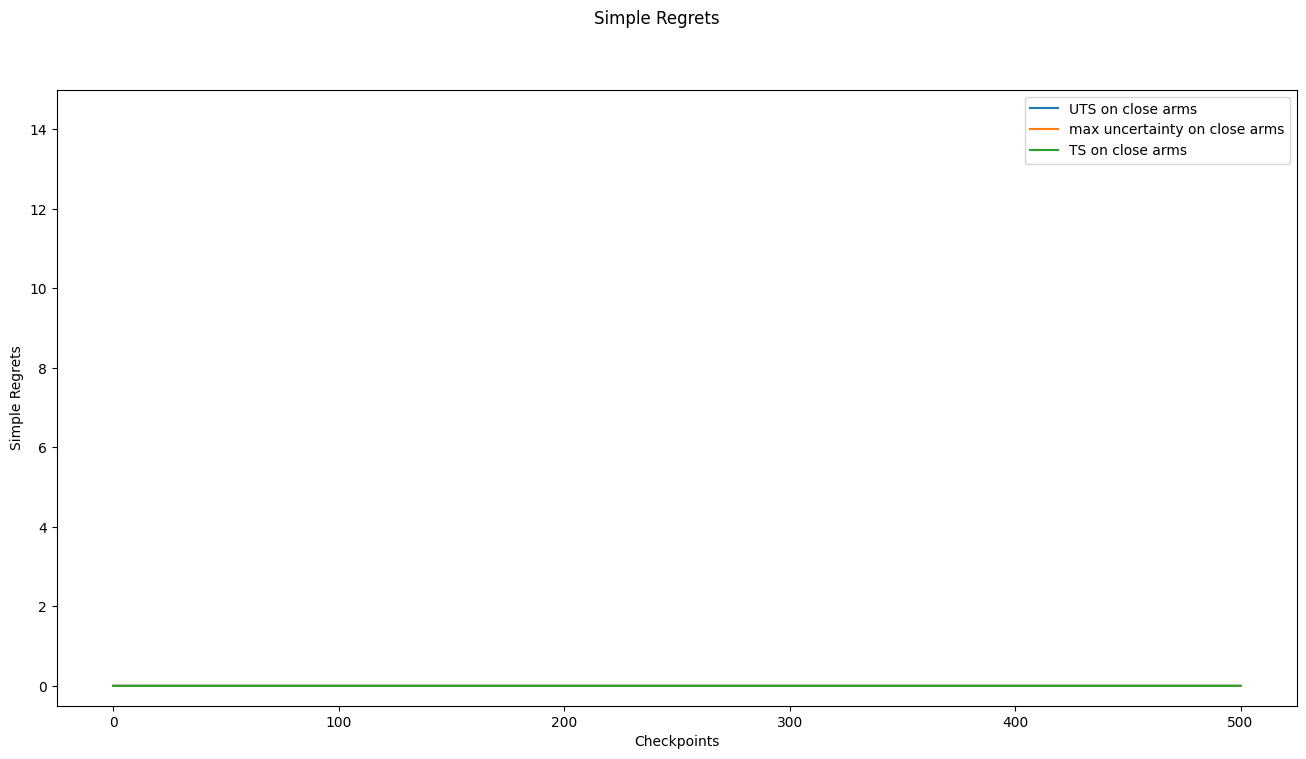

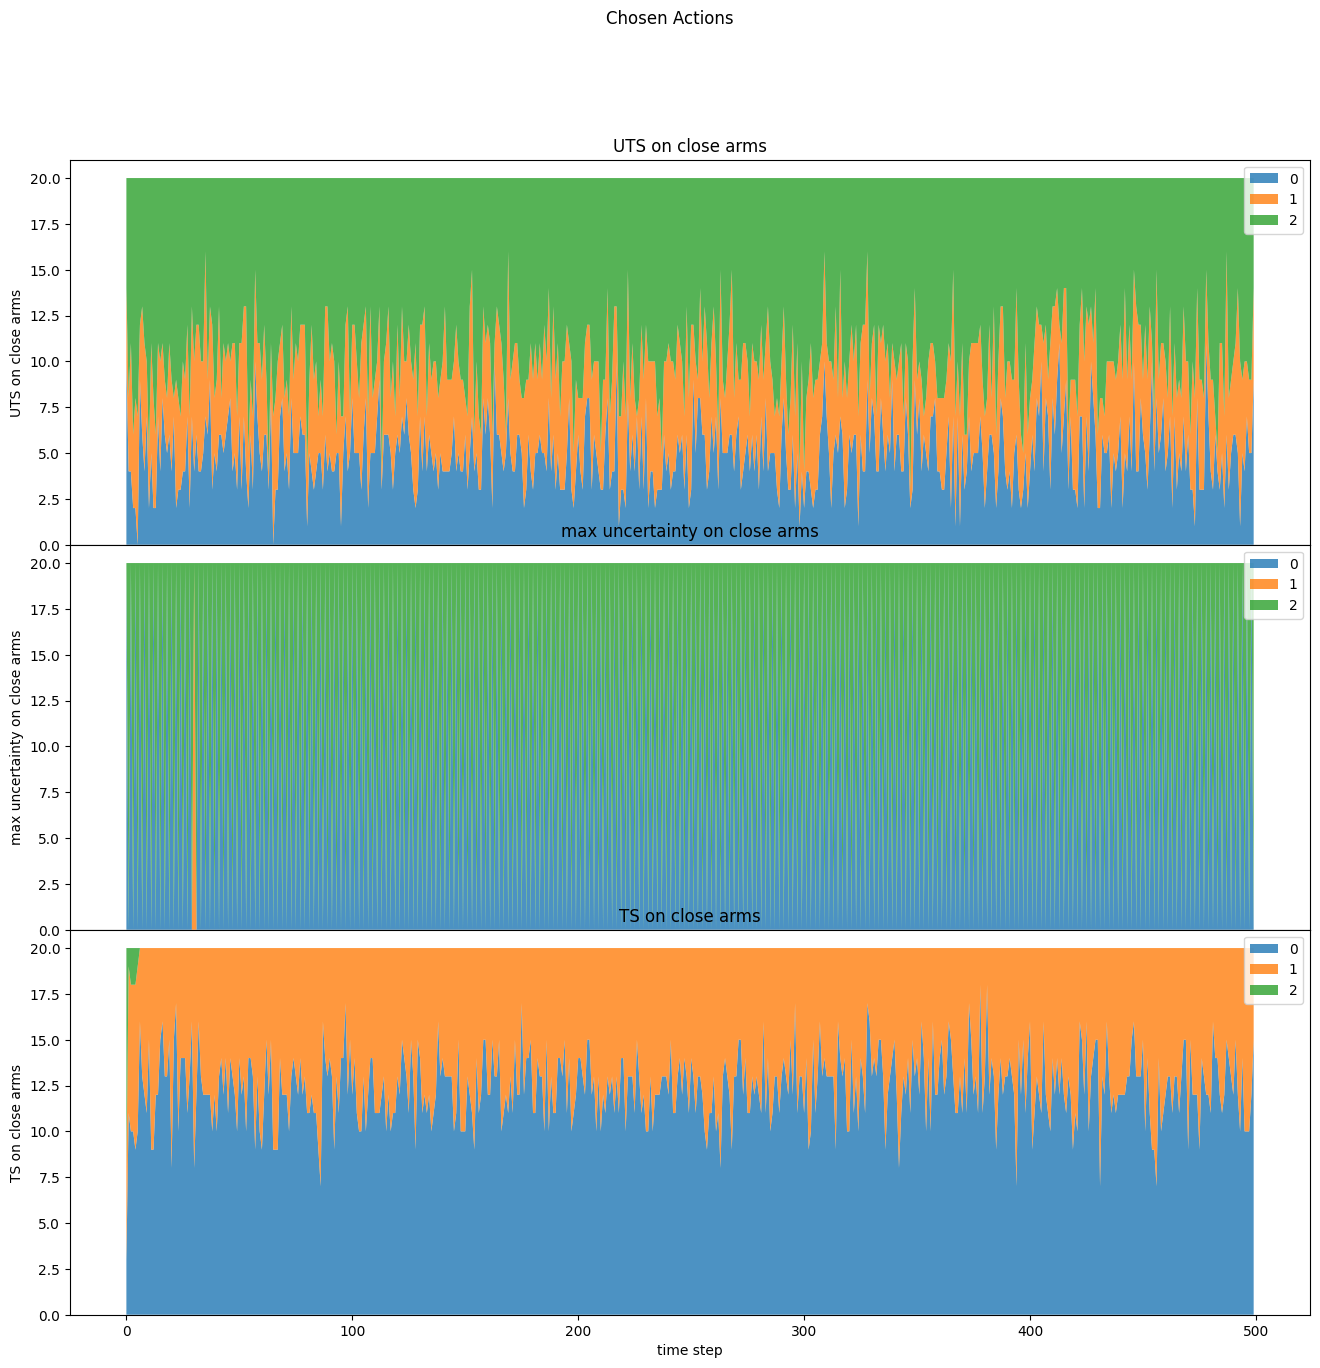

/Users/sarb/Desktop/ttts/notebooks/../experiment/theta_tracker.py:149: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


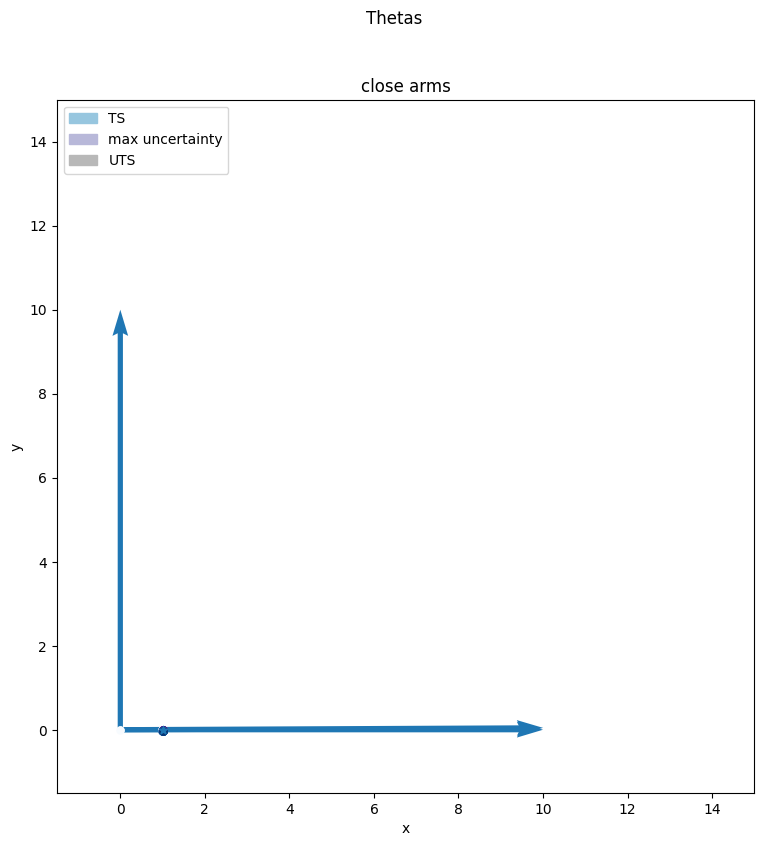

In [5]:
experiment.interact(n_steps=500, n_runs=20, log_progress=True)